In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

## Data Loading / Preprocessing - For the mock up, the model will use a subset of the dataset choosen

In [4]:
# Load the data

file_path = 'Resources/weatherAUS_Sample_AF.csv'
raw_df = pd.read_csv(file_path)
raw_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1/1/2015,Albury,11.4,33.5,0.0,NaN,NaN,WSW,30.0,ESE,...,45.0,14.0,1013.5,1011.0,NaN,NaN,21.0,32.7,No,No
1,1/2/2015,Albury,15.5,39.6,0.0,NaN,NaN,NE,56.0,ESE,...,45.0,12.0,1016.0,1012.4,NaN,NaN,25.6,38.2,No,No
2,1/3/2015,Albury,17.1,38.3,0.0,NaN,NaN,NNE,48.0,NE,...,35.0,19.0,1017.9,1012.3,NaN,NaN,29.2,37.0,No,No
3,1/4/2015,Albury,26.0,33.1,0.0,NaN,NaN,NNE,41.0,ESE,...,46.0,37.0,1013.6,1012.1,8.0,5.0,27.4,30.9,No,No
4,1/5/2015,Albury,19.0,35.2,0.0,NaN,NaN,E,33.0,SSE,...,60.0,34.0,1017.4,1014.7,8.0,NaN,25.6,32.5,No,No


In [5]:
# Check Datatypes

raw_df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [6]:
raw_df.isna().count()

Date             44442
Location         44442
MinTemp          44442
MaxTemp          44442
Rainfall         44442
Evaporation      44442
Sunshine         44442
WindGustDir      44442
WindGustSpeed    44442
WindDir9am       44442
WindDir3pm       44442
WindSpeed9am     44442
WindSpeed3pm     44442
Humidity9am      44442
Humidity3pm      44442
Pressure9am      44442
Pressure3pm      44442
Cloud9am         44442
Cloud3pm         44442
Temp9am          44442
Temp3pm          44442
RainToday        44442
RainTomorrow     44442
dtype: int64

In [7]:
raw_df['Location'].nunique()

49

## Handle Date column:
Evaluate if date is needed. If so, two options:
- Split "Date" column to year, month and day to prepare for use in regression model
- Pandas datetime column to ordinal (toordinal)

In [8]:
# Date column handling

df = raw_df.copy()

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2015-01-01,Albury,11.4,33.5,0.0,NaN,NaN,WSW,30.0,ESE,...,1011.0,NaN,NaN,21.0,32.7,No,No,2015,1,1
1,2015-01-02,Albury,15.5,39.6,0.0,NaN,NaN,NE,56.0,ESE,...,1012.4,NaN,NaN,25.6,38.2,No,No,2015,1,2
2,2015-01-03,Albury,17.1,38.3,0.0,NaN,NaN,NNE,48.0,NE,...,1012.3,NaN,NaN,29.2,37.0,No,No,2015,1,3
3,2015-01-04,Albury,26.0,33.1,0.0,NaN,NaN,NNE,41.0,ESE,...,1012.1,8.0,5.0,27.4,30.9,No,No,2015,1,4
4,2015-01-05,Albury,19.0,35.2,0.0,NaN,NaN,E,33.0,SSE,...,1014.7,8.0,NaN,25.6,32.5,No,No,2015,1,5


## Check if Bucketing Required

In [9]:
# Check the unique value counts to see if binning is required
df.Year.value_counts()

2016    17934
2015    17885
2017     8623
Name: Year, dtype: int64

In [11]:
# Check the unique value counts to see if binning is required
df.Location.value_counts()

Uluru               907
Moree               907
MountGinini         907
Richmond            907
Wollongong          907
Darwin              907
Cairns              907
Katherine           907
Townsville          907
PerthAirport        907
Dartmoor            907
Walpole             907
Tuggeranong         907
Nhil                907
Melbourne           907
PearceRAAF          907
CoffsHarbour        907
Adelaide            907
Perth               907
Portland            907
Sale                907
AliceSprings        907
Woomera             907
SalmonGums          907
SydneyAirport       907
NorahHead           907
MelbourneAirport    907
WaggaWagga          907
Launceston          907
Hobart              907
Penrith             907
Albany              907
Canberra            907
Williamtown         907
GoldCoast           907
Ballarat            907
BadgerysCreek       907
MountGambier        907
Nuriootpa           907
Watsonia            907
Brisbane            907
Witchcliffe     

## Update "RainTomorrow" and "RainToday" Columns to Binary Values

In [145]:
df['RainTomorrow'].value_counts()

No     33611
Yes     9594
Name: RainTomorrow, dtype: int64

In [146]:
df['RainToday'].value_counts()

No     33618
Yes     9594
Name: RainToday, dtype: int64

In [147]:
df['RainTomorrow'] = df.RainTomorrow.eq('Yes').mul(1)
df['RainTomorrow'].value_counts()

0    34848
1     9594
Name: RainTomorrow, dtype: int64

In [148]:
df['RainToday'] = df.RainToday.eq('Yes').mul(1)
df['RainToday'].value_counts()

0    34848
1     9594
Name: RainToday, dtype: int64

In [149]:
df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                 int32
RainTomorrow              int32
Year                      int64
Month                     int64
Day                       int64
dtype: object

## May Need to Handle Class Imbalance - TBD

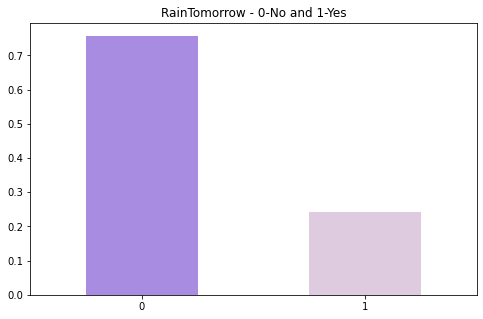

In [182]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
df.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['mediumpurple','thistle'], alpha = 0.8, rot=0)
plt.title('RainTomorrow - 0-No and 1-Yes')
plt.show()

## Drop Unnecessary Columns / Handle Missing Data

In [151]:
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')

# Drop the null rows
df = df.dropna()

#columns = ['Date', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm']
columns = ['Date', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
df = df.drop(columns, axis=1)

In [152]:
print(df.shape)
df.head()

(12610, 22)


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
3632,Moree,22.1,29.4,44.6,43.6,0.8,43.0,20.0,13.0,67.0,...,1013.6,8.0,8.0,24.0,28.9,1,0,2015,1,5
3633,Moree,20.7,33.4,0.0,6.0,11.3,44.0,17.0,13.0,54.0,...,1015.3,1.0,4.0,25.8,31.8,0,0,2015,1,6
3634,Moree,20.0,33.7,0.0,9.8,13.5,37.0,19.0,6.0,50.0,...,1014.0,1.0,1.0,25.0,32.6,0,0,2015,1,7
3638,Moree,25.3,31.8,0.0,35.0,0.0,43.0,26.0,17.0,56.0,...,1007.6,7.0,7.0,26.1,31.0,0,1,2015,1,11
3639,Moree,20.7,29.6,2.4,5.8,0.5,35.0,26.0,19.0,89.0,...,1007.3,7.0,7.0,21.7,28.7,1,1,2015,1,12


## Encode Columns - Use OneHotEncoder

In [153]:
# Generate our categorical variable list
df_cat = df.dtypes[df.dtypes == "object"].index.tolist()
df_cat

['Location']

In [154]:
df[df_cat].nunique()

Location    22
dtype: int64

In [155]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(df[df_cat]))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(df_cat)
encode_df.head()


,Location_AliceSprings,Location_Brisbane,Location_Cairns,Location_Darwin,Location_Hobart,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,...,Location_Perth,Location_PerthAirport,Location_Portland,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_WaggaWagga,Location_Watsonia,Location_Williamtown,Location_Woomera
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [156]:
# Merge one-hot encoded features and drop the originals
df = df.merge(encode_df,left_index=True, right_index=True)
df = df.drop(df_cat, axis=1)
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Location_Perth,Location_PerthAirport,Location_Portland,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_WaggaWagga,Location_Watsonia,Location_Williamtown,Location_Woomera
3632,22.1,29.4,44.6,43.6,0.8,43.0,20.0,13.0,67.0,46.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3633,20.7,33.4,0.0,6.0,11.3,44.0,17.0,13.0,54.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3634,20.0,33.7,0.0,9.8,13.5,37.0,19.0,6.0,50.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3638,25.3,31.8,0.0,35.0,0.0,43.0,26.0,17.0,56.0,37.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3639,20.7,29.6,2.4,5.8,0.5,35.0,26.0,19.0,89.0,54.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [157]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month',
       'Day', 'Location_AliceSprings', 'Location_Brisbane', 'Location_Cairns',
       'Location_Darwin', 'Location_Hobart', 'Location_Melbourne',
       'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree',
       'Location_MountGambier', 'Location_NorfolkIsland', 'Location_Nuriootpa',
       'Location_Perth', 'Location_PerthAirport', 'Location_Portland',
       'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville',
       'Location_WaggaWagga', 'Location_Watsonia', 'Location_Williamtown',
       'Location_Woomera'],
      dtype='object')

## Variable Declaration and Split into Test/Train

In [158]:
# define Target Variable
X = df.copy()
X = X.drop("RainTomorrow", axis=1)
y = df["RainTomorrow"]

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

## Scale the Data
- StandardScaler
- MinMaxScaler

#### Using StandardScaler for the mock up

In [159]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Define Machine Learning Model
### We want to evaluate the following three models to find the best fit:
- Random forest
- GBM (Boosting)
- Logistic
####  Balanced Random Forest mockup below

In [160]:
# Create a random forest classifier.

#from sklearn.ensemble import RandomForestClassifier
#rf_model = RandomForestClassifier(n_estimators=128, random_state=42) 

from imblearn.ensemble import BalancedRandomForestClassifier
rf_model = BalancedRandomForestClassifier(n_estimators=100, random_state=42) 

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data.
y_pred = rf_model.predict(X_test_scaled)



## Model Validation
- Accuracy Report
- Confusion Matrix
- Classification Report



In [161]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,452,119
Actual 1,37,147


In [162]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.92      0.79      0.80      0.85      0.80      0.63       571
          1       0.55      0.80      0.79      0.65      0.80      0.63       184

avg / total       0.83      0.79      0.80      0.80      0.80      0.63       755



In [163]:
# Calculated the balanced accuracy score
# YOUR CODE HERE
balanced_accuracy_score(y_test, y_pred)

0.7952533693748572

In [164]:
# List the features sorted in descending order by feature importance
importances = rf_model.feature_importances_
for importance, feat in sorted(zip(rf_model.feature_importances_, X.columns), reverse=True):
    print(f'{feat}: ({importance})')

Sunshine: (0.13610704488071365)
Humidity3pm: (0.11916974593407162)
Cloud3pm: (0.09821980146574188)
Humidity9am: (0.054829674444684916)
WindGustSpeed: (0.051582237040624944)
Pressure9am: (0.05077363728296846)
Cloud9am: (0.0434898298758254)
Pressure3pm: (0.04268162721813803)
Temp3pm: (0.039918824517637015)
MaxTemp: (0.039359088287014635)
MinTemp: (0.03921024478005234)
Evaporation: (0.03908959930890956)
Temp9am: (0.038312599609122595)
Day: (0.037908616818076196)
Rainfall: (0.033681383044874315)
WindSpeed9am: (0.030868806929105777)
WindSpeed3pm: (0.029360705324558475)
Month: (0.0261461049450062)
RainToday: (0.010364330322409241)
Year: (0.010109590156856176)
Location_Brisbane: (0.00761077608219013)
Location_Perth: (0.005439877578569182)
Location_Hobart: (0.005258228951181974)
Location_PerthAirport: (0.004348440376827016)
Location_Darwin: (0.002793638424736647)
Location_MelbourneAirport: (0.0016995697715612398)
Location_Melbourne: (0.001285121764373224)
Location_AliceSprings: (0.000380854864